# Indian Liver Patient Records

The dataset is taken from UCI Machine Learning Repository. It contains patient records of liver and non-liver patients from North East of Andhra Pradesh. We will be applying concepts like Data Preprocessing,Data Visualization,Feature Selection and Machine Learning concepts like Regression and Classification to our dataset.Further concepts like Hyperparameter tuning and Ensemble methods are also applied to the dataset.


# Description of columns:
Age: Age of the patient   

Gender: Sex of the patient 

Total_Bilirubin: in mg/dL Yellow pigment that occurs normally when red blood cells break or liver isn’t breaking down waste properly. (total bilirubin=direct + indirect bilirubin).High level indicate your liver isn't cleaning it properly.

Direct_Bilirubin: Bilirubin attached by liver to glucuronic acid (conjugated bilirubin) in mg/dL  

Alkaline_Phosphotase: An enzyme found in liver in IU/L

Alamine_Aminotransferase : An enzyme found in liver in IU/L

Aspartate_Aminotransferase : An enzyme found in liver in IU/L

Total_Protiens :Total Proteins g/dL

Albumin:Globular protein made by liver in g/dL

Albumin_and_Globulin_Ratio:A/G ratio

Dataset:Label (patient has liver disease:1 or not:0)



# Reading Dataset

In [1]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
#reading datset
df=pd.read_csv ('indian_liver_patient.csv')

In [3]:
df["Dataset"].replace({2: 0}, inplace=True)

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
# in knowing the number of rows and columns
df.shape

(583, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


All the columns contain numeric datatype except Gender column.

In [7]:
#calculating some statistical data
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


# Grouping data

In [8]:
#Grouping datset based on Result
df.groupby("Dataset").size()

Dataset
0    167
1    416
dtype: int64

The count of liver patient=416    
The count of non-liver patient=167

In [9]:
#Grouping datset based on Gender
df.groupby("Gender").size()

Gender
Female    142
Male      441
dtype: int64

Number of male =441  
Number of female=142

# Data Preprocessing

There are various Data preprocessing steps that can be applied to improve the performance of the model.So few preprocessing steps that can be applied to this dataset are given below:

# Checking for null values

In [10]:
#looking for null values (True indicate that null value is present)
df.isna().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

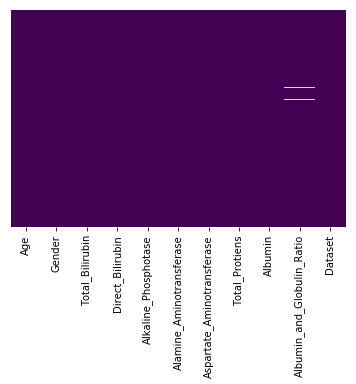

In [11]:
#yellow marks shows null values are present
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Only column name Albumin_and_Globulin_Ratio has null values.

# 1 Cleaning the dataset

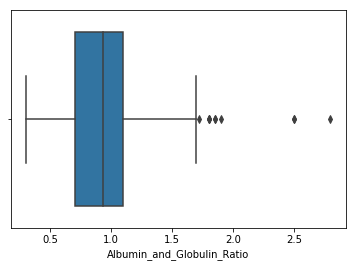

In [12]:
sns.boxplot(x="Albumin_and_Globulin_Ratio",data=df)  
df['Albumin_and_Globulin_Ratio'].fillna(value=df['Albumin_and_Globulin_Ratio'].median(),inplace=True)

As can be seen from the the above graph column Albumin_and_Globulin_Ratio has many outliers so using mean is not a good choice we will be using other central tendency i.e. median to fill null values in column.

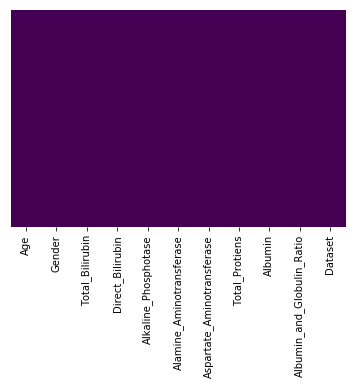

In [13]:
#now no null values present,data has beeen cleaned
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 2 Encoding Categorical data

In [14]:
# Import label encoder 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'Gender'. 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['Gender'].unique() 

array([0, 1], dtype=int64)

Encoding Categorical data means converting categorical values to numeric values.Only column named Gender had categorical value so it has been label encoded.Label Encoder is used to convert categorical values to numeric values.

Other Data preprocessing steps like integration of dataset was not possible as we are not using multiple sources for data extraction.
Data reduction is also not required as the dataset is not very huge in volume.

# Inserting Result Column in the dataset

Adding Categorial data to the dataset.We are adding Result column that will show Negative corresponding to 0 value in Dataset and Positive when value is 1
This column has been inserted for Visualization purpose.The column will not be used in Regression and Classification models.

In [15]:
Type_new = pd.Series([])
for i in range(len(df)): 
    if df["Dataset"][i] == 0:
        Type_new[i]="negative"
  
    elif df["Dataset"][i] == 1: 
        Type_new[i]="positive"
        
df.insert(11, "Result", Type_new) 

0:Negative    
1:Positive

# Modified dataset

In [16]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Result
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1,positive
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1,positive
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1,positive
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1,positive
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1,positive


1) In column Albumin_and_Globulin_Ratio missing values are replaced by median value    
2) Column Gender has been labelencoded (0:Female 1:Male)     
3) Result column has been added to the dataframe for visualization purpose.

# Data Visualization

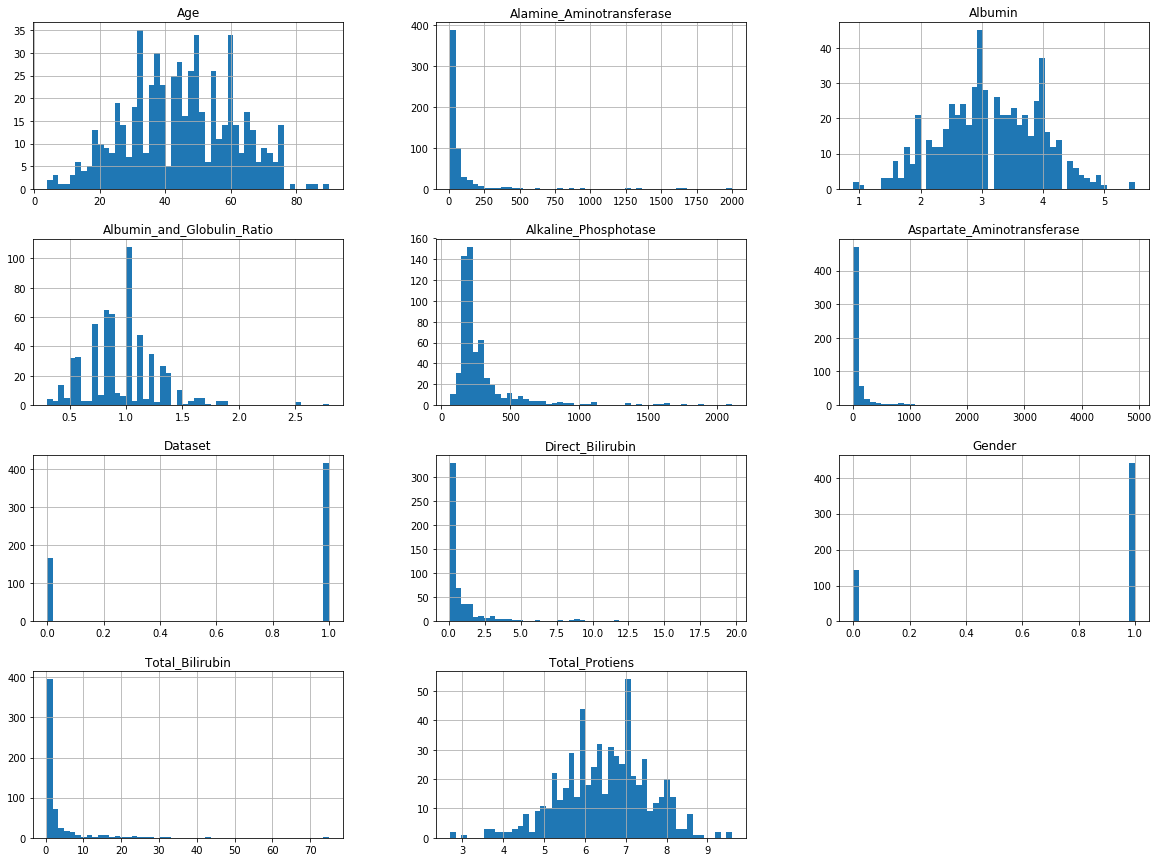

In [17]:
#histogram are plotted only for numeric values present in our dataset
#majority of age is between 27-45
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15));

# Finding Correlation using heatmap

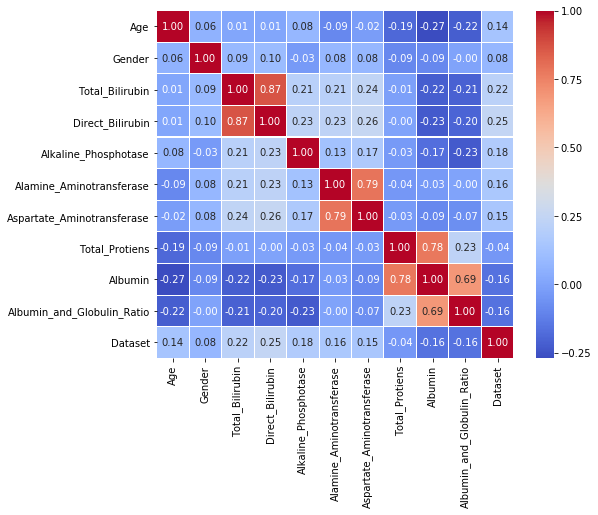

In [18]:
#heat map
f, ax = plt.subplots(figsize=(8, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax,fmt='.2f', cmap="coolwarm",linewidths=.05)
f.subplots_adjust(top=0.93)

Correlation is used to find relationship between different attributes in the given dataset. If the value comes out to be   
 1 it implies perfect correlation   
 -1 implies negative correlation    
 0 implies no correlation


There is high correlation between Albumin and Total_Proteins ,      
Albumin_and_Globulin_Ratio and Albumin ,        
Alamine_Aminotransferase and Aspartatae_Aminotransferase

# Pie plot for Gender

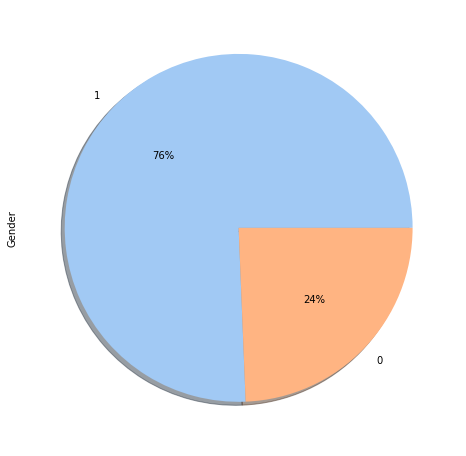

In [19]:
sns.set_palette("pastel")
gender_inference = df["Gender"].value_counts()
gender_inference.plot.pie(y="gender_inference" , autopct='%1.0f%%', shadow = True , figsize=(8,8));

The liver patient dataset has 76% males and 24% female which means that male are more in number as compared to female. Approximately three- fourth of the data is filled with male records and one-fourth with female records.

# Bar chart for result analysis

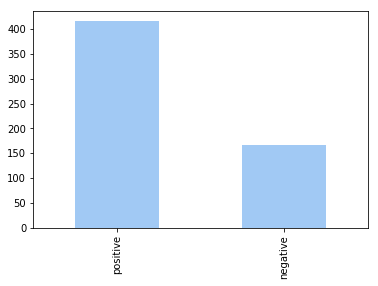

In [20]:
df['Result'].value_counts().plot.bar()

From the above bar chart it is evident 416 patients(positive) are diagnosed with liver disease and 167 patients(negative) didn’t had liver disease.

# Box plot for Albumin

Text(3.1999999999999886, 0.5, 'glucose values')

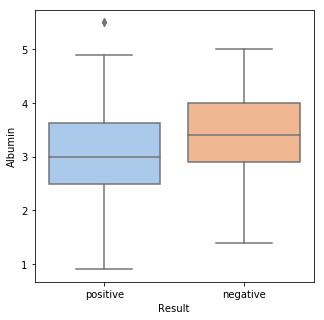

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(x="Result", y="Albumin",data=df)
ax.set_xlabel("result for diabetes",size = 12,alpha=0.8)
ax.set_ylabel("glucose values",size = 12,alpha=0.8)

Albumin is a protein and is made by liver. A normal albumin range is 3.4 to 5.4 g/dl.A lower albumin level is an indication towards that the patient may have liver disease.

# Scatter plot between Proteins and Albumin

Text(0, 0.5, 'Albumin')

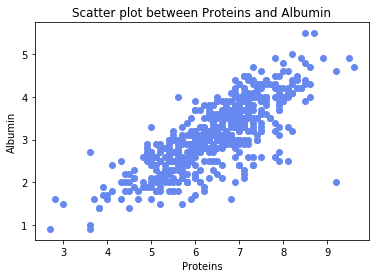

In [22]:
sns.set_palette("coolwarm")
plt.scatter(df.Total_Protiens,df.Albumin);
plt.title('Scatter plot between Proteins and Albumin')
plt.xlabel("Proteins")
plt.ylabel("Albumin")

The scatter plot above shows that as level of proteins increases Albumin also increase a positive correlation is shown between the two. So consumption of proteins can help patients regain Albumin levels in their body.

# Feature selection

Feature selection is used to select the features that contribute most to the output/prediction variable i.e y.
Top 5 features are shown below we are using chi2 as correlational statistic and selection method is SelectKBest which means top k variables will be choosen.

In [23]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2#we are using chi test for this
x=pd.DataFrame(df.iloc[:,:-2])
y=pd.DataFrame(df.iloc[:,-2])

bestfeatures=SelectKBest(score_func=chi2,k=5)#we are taking first 10 values
fit=bestfeatures.fit(x,y)

dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Score']

print(featureScores.nlargest(5,'Score'))#top 5 features are shown

                      Feature         Score
6  Aspartate_Aminotransferase  10203.328978
5    Alamine_Aminotransferase   6421.919946
4        Alkaline_Phosphotase   4039.855702
2             Total_Bilirubin    329.873827
3            Direct_Bilirubin    187.005784


Top 5 features are:     
Aspartate_Aminotransferase       
Alamine_Aminotransferase         
Alkaline_Phosphotase         
Total_Bilirubin          
Direct_Bilirubin          

# Regression Models

One independent variable i.e x and one dependent variale that is y.Both  x and y should be continuous values.

There are various performance measure that can be used to predict efficiency of a model.In the below model we have used R squared ard root mean squared error.Concept of with and without cross validation is also used.                                 Higher R squared valued and accuracy better is the model and lower root mean square error value better is the model.

# Linear Regression

In [24]:
#linear regression b/w proteins and albumin
x=pd.DataFrame(df.iloc[:,8])
y=pd.DataFrame(df.iloc[:,7])

In [25]:
#splitting the dataset into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=29)

In [26]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
print('Coeffecient\n',regressor.coef_)
print('Intercept\n',regressor.intercept_)

Coeffecient
 [[1.02346664]]
Intercept
 [3.26830441]


In [30]:
#equation of regression line
print("y_pred =",regressor.coef_,"x","+",regressor.intercept_)

y_pred = [[1.02346664]] x + [3.26830441]


In [31]:
y_pred=regressor.predict(x_test)

In [32]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.5938100307944307

In [33]:
from sklearn.metrics import mean_squared_error,r2_score 
print('R squared value:{}'.format(r2_score(y_test,y_pred)))
print('Mean squared error:{}'.format(mean_squared_error(y_test,y_pred)))
print('absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('squared error',metrics.mean_squared_error(y_test,y_pred))
print('mean absolute error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R squared value:0.7298215941008142
Mean squared error:0.3526103526720828
absolute error 0.45939722234335084
squared error 0.3526103526720828
mean absolute error 0.5938100307944307


# Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=29)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=29, splitter='best')

In [35]:
y_pred=tree_reg.predict(x_test)

In [36]:
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.6360109523285224

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
print('R squared value:{}'.format(r2_score(y_test,y_pred)))
print('Mean squared error:{}'.format(mean_squared_error(y_test,y_pred)))
print('absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('squared error',metrics.mean_squared_error(y_test,y_pred))
print('mean absolute error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R squared value:0.6900549072653372
Mean squared error:0.4045099314818341
absolute error 0.49236584613469975
squared error 0.4045099314818341
mean absolute error 0.6360109523285224


# Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=29)
forest_reg.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=29, verbose=0, warm_start=False)

In [39]:
y_pred=forest_reg.predict(x_test)

In [40]:
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.6316421481242452

In [41]:
from sklearn.metrics import mean_squared_error,r2_score
print('R squared value:{}'.format(r2_score(y_test,y_pred)))
print('Mean squared error:{}'.format(mean_squared_error(y_test,y_pred)))
print('absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('squared error',metrics.mean_squared_error(y_test,y_pred))
print('mean absolute error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R squared value:0.6942983522918483
Mean squared error:0.39897180328701093
absolute error 0.4963767252820373
squared error 0.39897180328701093
mean absolute error 0.6316421481242452


# SVR

In [42]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
y_pred = svm_reg.predict(x_test)

In [44]:
svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

0.5946281879389939

In [45]:
from sklearn.metrics import mean_squared_error,r2_score
print('R squared value:{}'.format(r2_score(y_test,y_pred)))
print('Mean squared error:{}'.format(mean_squared_error(y_test,y_pred)))
print('absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('squared error',metrics.mean_squared_error(y_test,y_pred))
print('mean absolute error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R squared value:0.7290765724173874
Mean squared error:0.3535826818916114
absolute error 0.46588480756176864
squared error 0.3535826818916114
mean absolute error 0.5946281879389939


# Polynomial Regression

0.6725274857409554
0.6154570856916448


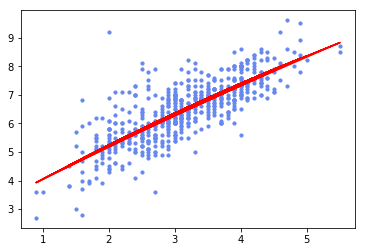

In [46]:
#degree 2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

x=pd.DataFrame(df.iloc[:,8])
y=pd.DataFrame(df.iloc[:,7])
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse =np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='r')
plt.show()

# Conclusion

In [47]:
import pandas as pd 
data = [['Linear Regression',73,0.59],['SVR', 73,0.59],['Random Forest Regressor',70,0.63], ['Decision Tree Regressor', 69,0.63],['Polynomial Regression',62,"0.67"]] 
df1 = pd.DataFrame(data, columns = ['Tyes of Regression Model','R Squared Value in percentage','rmse value']) 
df1

,Tyes of Regression Model,R Squared Value in percentage,rmse value
0,Linear Regression,73,0.59
1,SVR,73,0.59
2,Random Forest Regressor,70,0.63
3,Decision Tree Regressor,69,0.63
4,Polynomial Regression,62,0.67


The value of R Squared is highest for for Linear Regression Model and SVR followed by Random Forest Regressor and then Decision tree Regressor.Ploynomial regression will give good results when degree is one that is Linear Regression so there is not need to apply Polynomial Regression.     
Linear Regression and SVR are best models for our dataset.

# Using Cross Validation

# Linear Regression

In [48]:
#using k fold validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, x_train, y_train,scoring="neg_mean_squared_error", cv=10)
regressor_rmse_scores = np.sqrt(-scores)


In [49]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
#linear regression
display_scores(regressor_rmse_scores)

Scores: [0.79564621 0.67140552 0.65668654 0.58502448 0.8087202  0.61023141
 0.58843598 0.81187735 0.69835934 0.70275352]
Mean: 0.6929140549101717
Standard deviation: 0.0833132565449721


# Decision tree

In [50]:
#decision tree
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, x_train, y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.80745139 0.72542857 0.6491256  0.71375108 0.81110803 0.61557987
 0.58168107 0.9346438  0.77161202 0.74582679]
Mean: 0.735620822437205
Standard deviation: 0.09901438895747901


# Random Forest

In [51]:
#random forest
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, x_train, y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [0.79823721 0.7320142  0.67168611 0.69799959 0.82103919 0.6194516
 0.58896975 0.92980603 0.75000506 0.72687069]
Mean: 0.7336079425755526
Standard deviation: 0.09470258482585799


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

# SVM

In [52]:
#svm
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_reg, x_train, y_train,scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores)
display_scores(svm_rmse_scores)

Scores: [0.80652122 0.65865645 0.67469488 0.58291259 0.8064708  0.60769729
 0.58721807 0.8106266  0.70966652 0.72727577]
Mean: 0.69717401845399
Standard deviation: 0.08542672166841239


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

# Conclusion

In [53]:
import pandas as pd 
data = [['Linear Regression',.69],['SVR',.69],['Random Forest Regressor',.73], ['Decision Tree Regressor',.74]] 
df2 = pd.DataFrame(data, columns = ['Tyes of Regression Model', 'rmse value']) 
df2

,Tyes of Regression Model,rmse value
0,Linear Regression,0.69
1,SVR,0.69
2,Random Forest Regressor,0.73
3,Decision Tree Regressor,0.74


Linear Regression and SVR have low value of root mean square error so they are best models for our dataset.

# Multiple Linear Regression

# Assumptions

There are 6 assumptions for Multiple Linear Regression some of them are checked below:

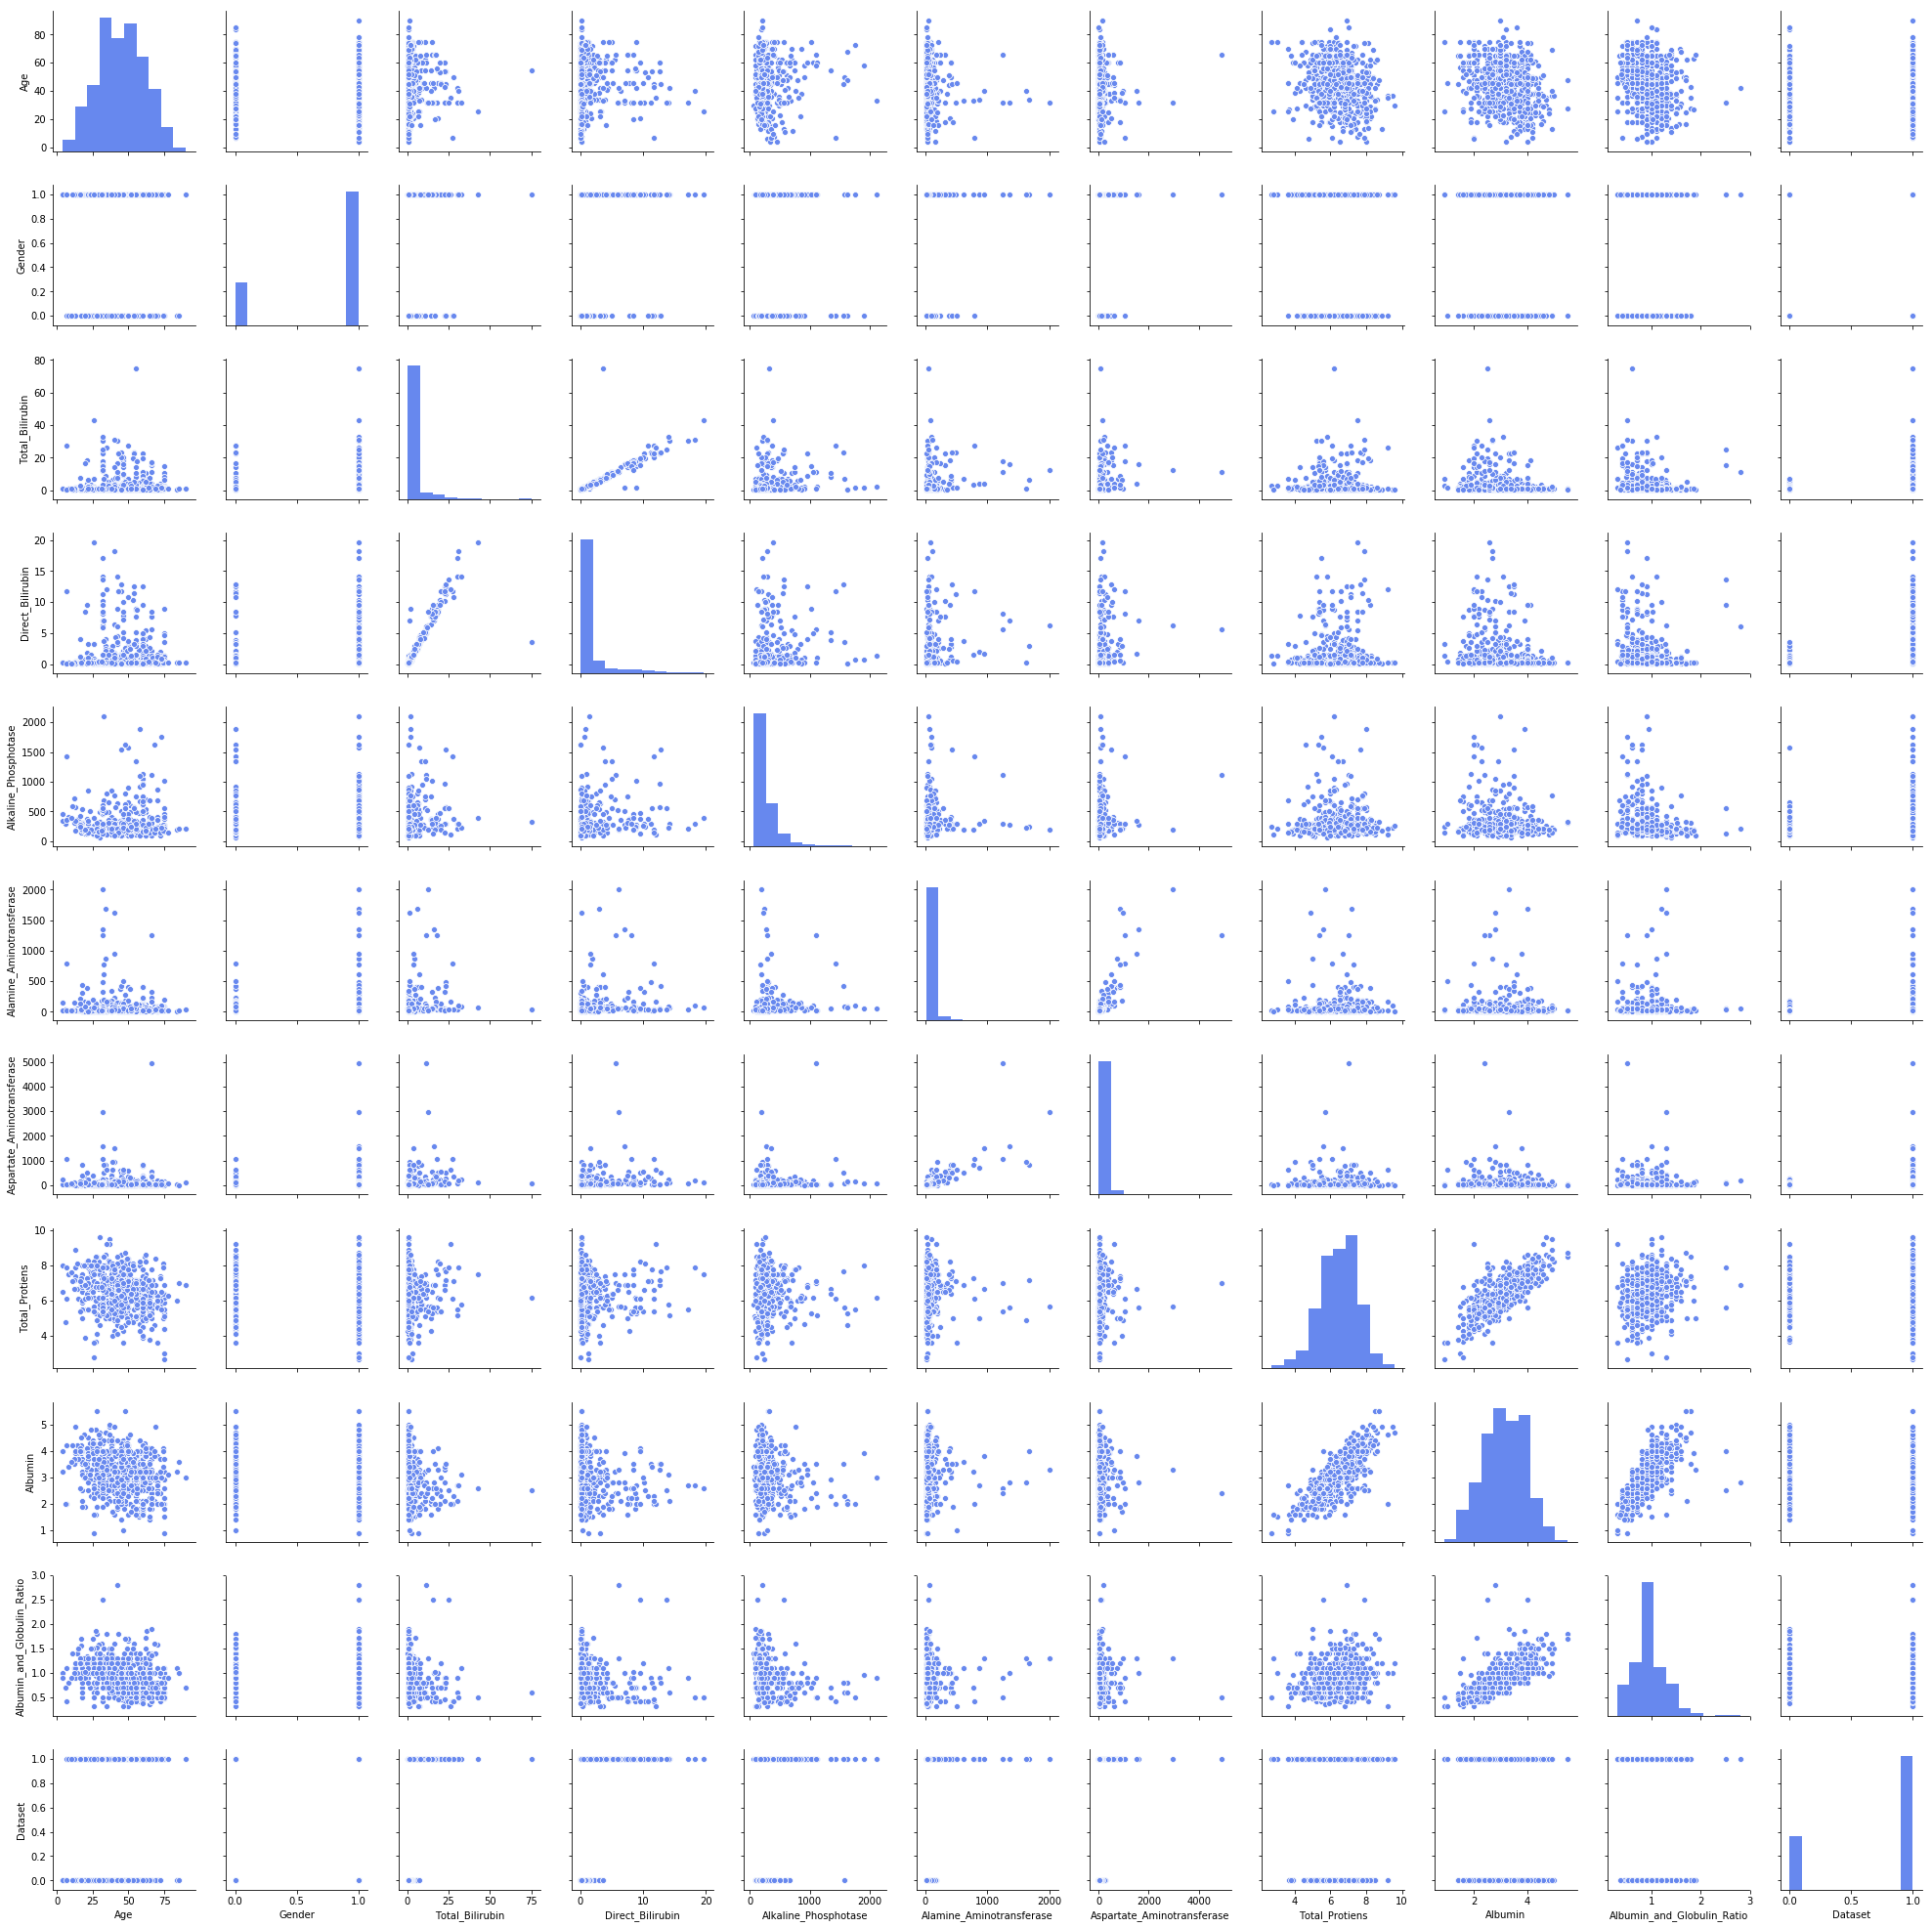

In [54]:
#1 linearity b/w x's and y: x's should have linear relationship with y
sns.pairplot(df,palette="husl")

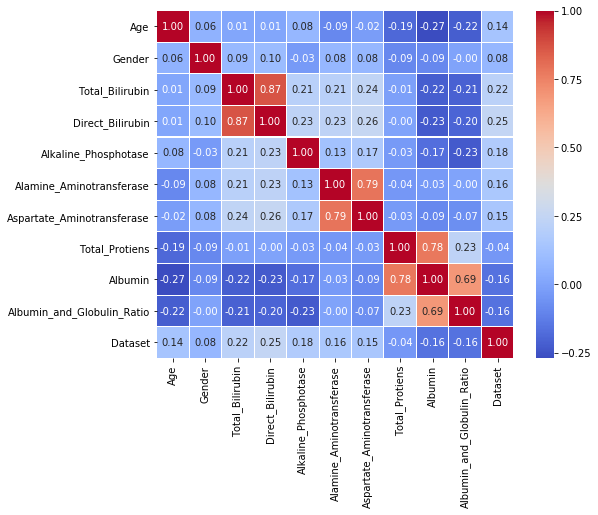

In [55]:
#2 no multicollinearity heat map: x's should not be correleated
f, ax = plt.subplots(figsize=(8, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax,fmt='.2f', cmap="coolwarm",linewidths=.05)
f.subplots_adjust(top=0.93)

In [56]:
X = df.iloc[:,6:8] 
y = df.iloc[:,8]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=29)

In [58]:
#3 Homoscedaticity: error term should have constant variance for this we are using levenes test
from scipy import stats
residual_test = np.column_stack([y_test,y_pred])
residual_test = pd.DataFrame(residual_test)
residual_test.columns='Y_test predictions'.split()
stats.levene(residual_test['Y_test'], residual_test['predictions'])

LeveneResult(statistic=0.18735606396105264, pvalue=0.6655284264827875)

If pvalue>0.5 Homoscedaticity     
   pvalue<0.5 Heteroscedaticity    
Since value is greater than 0.5 it means Homoscedaticity

In [59]:
from sklearn.linear_model import LinearRegression
multiple_regressor = LinearRegression()
multiple_regressor.fit(X_train, y_train)
y_pred = multiple_regressor.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error,r2_score 
print('R squared value:{}'.format(r2_score(y_test,y_pred)))

R squared value:0.7554001654138349


Multiple linear regression has highest value amongst all regression model i.e. 75%

# Classification

y/class label should have discrete values.

There are different performance measures that can be used to predict efficiency of the model.We are using four of them:      
1) Confusion matrix     
2) Classification Report    
3) Accuracy score    
4) ROC accuracy score   

In [61]:
#classification
X=df.iloc[:,:-2]
y=df.iloc[:,-2]

In [62]:
#splitting into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=29 )

In [63]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


# Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

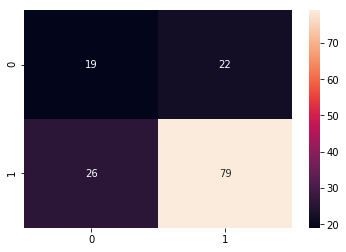

In [65]:
#1 confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot = True ,fmt = "d")

In [66]:
#2 classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.46      0.44        41
           1       0.78      0.75      0.77       105

   micro avg       0.67      0.67      0.67       146
   macro avg       0.60      0.61      0.60       146
weighted avg       0.68      0.67      0.68       146



In [67]:
#3 accuracy score/value
classifier.score(X_test,y_test)

0.6712328767123288

In [68]:
#4 ROC curve
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.6078977932636469

# Logistic regression

In [69]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


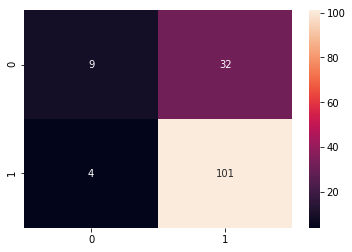

In [70]:
#1 confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot = True ,fmt = "d")

In [71]:
#2 classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.22      0.33        41
           1       0.76      0.96      0.85       105

   micro avg       0.75      0.75      0.75       146
   macro avg       0.73      0.59      0.59       146
weighted avg       0.74      0.75      0.70       146



In [72]:
#3 accuracy score/value
classifier.score(X_test,y_test)

0.7534246575342466

In [73]:
#4 ROC curve
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.5907084785133565

# Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

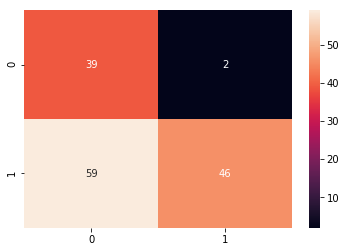

In [75]:
#1 confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot = True ,fmt = "d")

In [76]:
#2 classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.95      0.56        41
           1       0.96      0.44      0.60       105

   micro avg       0.58      0.58      0.58       146
   macro avg       0.68      0.69      0.58       146
weighted avg       0.80      0.58      0.59       146



In [77]:
#3 accuracy score/value
classifier.score(X_test,y_test)

0.5821917808219178

In [78]:
#4 ROC curve
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.69465737514518

# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=80)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [80]:
error_rate = []
for i in range(1,150):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

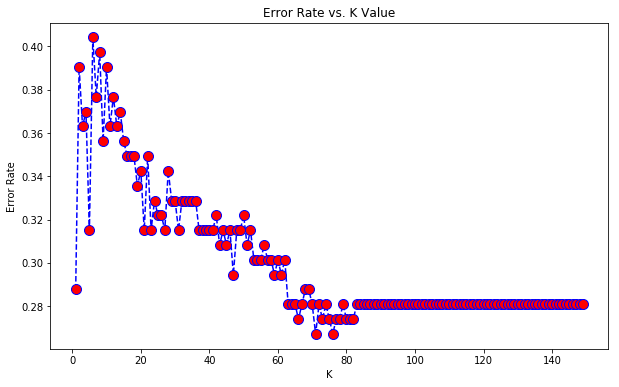

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(1,150),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We have choosen k value seeing the above graph.The value of k should be picked when the graph starts becoming constant.As we can see at k=80 the graph shows constant line so we have tried different values of k between the range 80 to 140 and found that k=80 gives best results. 

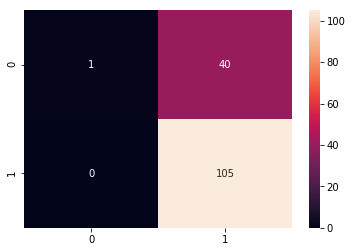

In [82]:
#1 confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot = True ,fmt = "d")

In [83]:
#2 classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05        41
           1       0.72      1.00      0.84       105

   micro avg       0.73      0.73      0.73       146
   macro avg       0.86      0.51      0.44       146
weighted avg       0.80      0.73      0.62       146



In [84]:
#3 accuracy score/value
classifier.score(X_test,y_test)

0.726027397260274

In [85]:
#4 ROC curve
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.5121951219512195

# SVM

We have tried with all three types of kernel i.e. linear,polynomial and radial basis function(rbf) and found that better results are shown in case of linear and polynomial so that is why we have used kernel=linear is used below.Gamma values are automatically taken.

In [86]:
from sklearn.svm import SVC 
classifier = SVC(kernel = 'linear',gamma='auto')
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

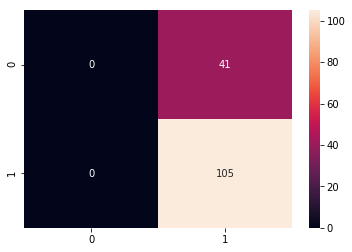

In [87]:
#1 confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot = True ,fmt = "d")

In [88]:
#2 classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.72      1.00      0.84       105

   micro avg       0.72      0.72      0.72       146
   macro avg       0.36      0.50      0.42       146
weighted avg       0.52      0.72      0.60       146



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
#3 accuracy score/value
classifier.score(X_test,y_test)

0.7191780821917808

In [90]:
#4 ROC curve
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.5

# Conclusion

In [91]:
import pandas as pd 
data = [['Logistic Regression',75],['KNN', 73],['SVM',72], ['Decision Tree', 69],['Naive Bayes',58]] 
df3 = pd.DataFrame(data, columns = ['Tyes of Regression Model','Accuracy']) 
df3

,Tyes of Regression Model,Accuracy
0,Logistic Regression,75
1,KNN,73
2,SVM,72
3,Decision Tree,69
4,Naive Bayes,58


The best classifier for our model is Logistic Regresso,KNN and SVM as the have the highest accuracy.Naive Bayes on the other hand gives least Accuracy value amongst all other classification models used. 

# Hypertuning

Fine tuning the SVM model so that the model can optimally solve the machine learning problem ,keeping in mind that it doesn't lead to overfitting of data.

# Grid Search

After we specify C and gamma value all permutation and combinations will be applied and then the best value amongst them will be picked.We can change the values of  C and gamma and can increase the number like now 4 values are taken for C and gamma we can also take 5 or more.

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [94]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [95]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [96]:
grid.best_score_

0.7276887871853547

In [97]:
grid_predictions = grid.predict(X_test)

In [98]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25        41
           1       0.74      0.93      0.83       105

   micro avg       0.72      0.72      0.72       146
   macro avg       0.62      0.55      0.54       146
weighted avg       0.67      0.72      0.67       146



The accuracy score is 73%

# Random Search

In this randomly the values are picked, all permutations and combinations are not checked .So it gives faster results as compared to Grid Search.

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
rnd = RandomizedSearchCV(SVC(),param_grid,refit=True,verbose=2)
rnd.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] gamma=0.1, C=100 ................................................
[CV] ................................. gamma=0.1, C=100, total=   0.0s
[CV] gamma=0.1, C=100 ................................................
[CV] ................................. gamma=0.1, C=100, total=   0.0s
[CV] gamma=0.1, C=100 ................................................
[CV] ................................. gamma=0.1, C=100, total=   0.0s
[CV] gamma=1, C=100 ..................................................
[CV] ................................... gamma=1, C=100, total=   0.0s
[CV] gamma=1, C=100 ..................................................
[CV] ................................... gamma=1, C=100, total=   0.0s
[CV] gamma=1, C=100 ..................................................
[CV] ................................... gamma=1, C=100, total=   0.0s
[CV] gamma=0.01, C=1 .................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [101]:
rnd.best_params_

{'gamma': 0.01, 'C': 1}

In [102]:
rnd.best_score_

0.7116704805491991

In [103]:
rnd_predictions = rnd.predict(X_test)

In [104]:
print(classification_report(y_test,rnd_predictions));

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.72      1.00      0.84       105

   micro avg       0.72      0.72      0.72       146
   macro avg       0.36      0.50      0.42       146
weighted avg       0.52      0.72      0.60       146



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The accuracy score is 72%

# Ensemble

We will try and combine different classification models to improve performance of our model.There are different Ensemble methods three of them are used below Voting Classifier,Bagging,Random Forest Classifier.

Logistic Regression,KNN,VotingClassifier gave best accuracy so these 3 are taken.    
Voting is taken to be hard means according to majority voting final output prediction will be made.

# Voting Classifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

 
log_clf = LogisticRegression(solver="liblinear", random_state=29)
knn_clf = KNeighborsClassifier(n_neighbors=80)
svm_clf = SVC(kernel='linear',gamma="auto", random_state=29)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', knn_clf), ('svc', svm_clf)],voting='hard')

In [106]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=29, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', KNeig...r',
  max_iter=-1, probability=False, random_state=29, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [108]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7534246575342466
KNeighborsClassifier 0.726027397260274
SVC 0.7191780821917808
VotingClassifier 0.726027397260274


Voting Classifier gave an accuracy of 73%

# Random Forest Classifier

It is an ensemble method.Collection of decision tree is called Random Forest.

In [109]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=29)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

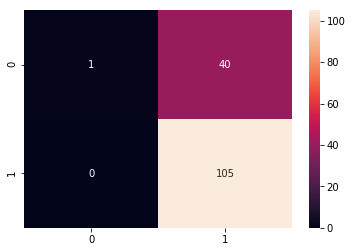

In [110]:
#1 confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot = True ,fmt = "d")

In [111]:
#2 classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05        41
           1       0.72      1.00      0.84       105

   micro avg       0.73      0.73      0.73       146
   macro avg       0.86      0.51      0.44       146
weighted avg       0.80      0.73      0.62       146



In [112]:
#3 accuracy score/value
rnd_clf.score(X_test,y_test)

0.7191780821917808

Random Forest Classifier accuracy came out to be 72%

# Bagging

Bagging is used to reduce the variance.It uses bootsrapping.We can use any type of classifier but here we are using Decison tree.

In [113]:
#bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=29), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1, random_state=29)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


In [114]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7054794520547946


In [115]:
tree_clf = DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.6643835616438356


Using Decision tree classifier without bagging gave accuracy 68% and when we used bagging ensemble method accuracy increased and became 70%

# Conclusion

In [116]:
import pandas as pd 
data = [['Voting Classifier',73],['Random Forest Classifier', 72],['Bagging',70]] 
df3 = pd.DataFrame(data, columns = ['Tyes of Ensemble methods','Accuracy']) 
df3

,Tyes of Ensemble methods,Accuracy
0,Voting Classifier,73
1,Random Forest Classifier,72
2,Bagging,70


Voting Classifier gave us an accuracy of 73%. Accuracy of decision tree was 68% whereas it improved with ensemble method Random Forest to 73% and accuracy using bagging as enseble method came out to be 70%